# Lab3 - Link Prediction

StudentID: 20127054

Name: Ngô Văn Trung Nguyên

---

## Self evaluation

| No.      | Criteria                                                        | Evaluation rate (%) |
|---------------|-----------------------------------------------------------------------|---------------------|
| 1 | Report on the knowledge related to link prediction | 100% |
| 2 | Explain the role and meaning of the code | 100% |
| 3 | Run the experiment on the provided dataset and comment on the results | 100% |
| 4 | Full and detailed report of the implementation process, source code. Clear presentation, reasonable layout. Organize files into folders thatshow what each group means like source, report, test, etc | 100% |

---

## Part 1: Report on the knowledge related to link prediction

- Link prediction is a task in network analysis and machine learning that aims to predict the existence or likelihood of a link between two entities in a network. This task is particularly relevant in social networks, recommendation systems, and various other networked domains.

### Similarity measure

- The similarity measure is a way of measuring how data samples are related or closed to each other.
- In the codes belows, the author used: Jaccard Distance and Cosine Distance.

#### *a. Jaccard Distance*

- The Jaccard similarity index is a measure of similarity for the two sets of data, with a range from 0 to 1.0. The higher the score, the more similar the two populations.
- While the Jaccard distance is straightforward to interpret, it is highly sensitive to small sample sizes, which can lead to misleading results. This sensitivity becomes especially apparent when dealing with very small samples or datasets that have missing observations
- The formula:
$$J(X,Y)=\frac{\left| X\cap Y \right|}{\left| X\cup Y \right|}$$
- Steps:
    - Step 1: Count the number of members which are shared between both sets.
    - Step 2: Count the total number of members in both sets (shared and un-shared).
    - Step 3: Divide the number of shared members (Step 1) by the total number of members (Step 2).

- The Jaccard distance is a metric used to measure the dissimilarity between two sets. It is calculated as 1 minus the Jaccard similarity 
$$D(X,Y)=1-J(X,Y)$$
- *Note: In the codes below, the author used J(X,Y) formula.

*Example: How similar are these two sets?*
- X = {0,1,2,4}
- Y = {0,2,3,4,5,6,7}

*Answer: $J(X,Y)=\frac{\left| X\cap Y \right|}{\left| X\cup Y \right|}=\frac{\left| \left\{ 0,2,4 \right\} \right|}{\left| \left\{ 0,1,2,3,4,5,6,7 \right\} \right|}=\frac{3}{8}=0.375$*

#### *b. Cosine Similarity*

- In the codes below, the author used a similar concept as cosine similarity known as the Otsuka–Ochiai coefficient. Otsuka–Ochiai coefficient named after Yanosuke Otsuka and Akira Ochiai, also known as the Ochiai–Barkman or Ochiai coefficient.
- The formula:
$$K=\frac{\left| A\cap B \right|}{\sqrt{\left| A \right|\times \left| B \right|}}$$

*Example: How similar are these two sets?*
- X = {0,1,2,4}
- Y = {0,2,3,4,5,6,7}

*Answer: $K=\frac{\left| \left\{ 0,2,4 \right\} \right|}{\sqrt{\left| \left\{ 0,1,2,4 \right\} \right|\times \left| \left\{ 0,2,3,4,5,6,7 \right\} \right|}}=\frac{3}{\sqrt{4\times 7}}=\frac{3}{\sqrt{28}}$*

---

### How to train the model to make predictions

- First, the author performs preprocessing by reading the train.csv file and checking for any NaN data or duplicate rows. After confirming that there are no abnormal issues, the entire dataset is read using networkx as a directed graph. After obtaining the directed graph, the author proceeds to create negative links. This is done by initially assigning a value of 1 to all links in the original network. Then, the author generate two random varialbes a and b with values ranging from 1 to 1862220 (Number of nodes in graph). After that, if the length of shortest path between a and b is greater than 2, the author considers it as a negative link and assigns it a value of -1 to distinguish it from positive links.

- Next, the author proceeds to split the dataset into separate train and test sets for positive links and negative links, respectively, with a ratio of 80-20. Then the author analyzed only train sets to gather some informations but this approach led to a cold start problem. To solve this problem, the author merged positive and negative links for train set, the same goes for test set. After that, the author proceeds to read the merged train and test. However, to avoid exceeding the memory limit when reading a large file into a dataframe, the author selectively read a small subset of rows from the file at random positions. The remaining rows are ignored.

- After reading two dataframes from the previous step, the author proceeds to add additional features to the predictive model like number of followers, Adamic/Adar Index, , Katz Score, Hits Score, shortest path, some svd fetures of adj matrix, some weight features, ...

- After the dataframe has been assigned with a set of feature columns for model prediction, the author removes three columns: the source node, the destination node, and the label column of the link. Then the author used the RandomForestClassifier model to make predictions and evaluate the model's performance using the F1 score. Then, the author used RandomizedSearchCV to search for the best hyperparameters for the model and the final results, measured by the F1 score, for both the train and test sets remain consistent, indicates that the current performance achieved by the model is the best obtained so far.

- The author then recalculated the total number of followers for both the source and destination nodes and added them to the previously created train and test dataframes. Additionally, the author added some new features to these dataframes such as "followers_preferential_attach" and "followees_preferential_attach". Once the new features had been added to the dataframe as mentioned above, the author used XGBoost along with RandomizedSearchCV to explore the best hyperparameters. The model is then evaluated on the train and test sets using the F1 score to determine the best overall performance achieved.

---

### Describe the algorithm(s)

#### PageRank

- Pagerank is an algorithm used to measure the importance or relevance of nodes in a directed graph. It was developed by Larry Page and Sergey Brin, the founders of Google, as a key component of their search engine's ranking system.
- Formula:

$$PR(u)=\sum_{v\in B_{u}}^{}\frac{PR(v)}{L(v)}$$

- The PageRank value for a page u is dependent on the PageRank values for each page v contained in the set Bu (the set containing all pages linking to page u), divided by the number L(v) of links from page v.

*Example: Consider this graph:*

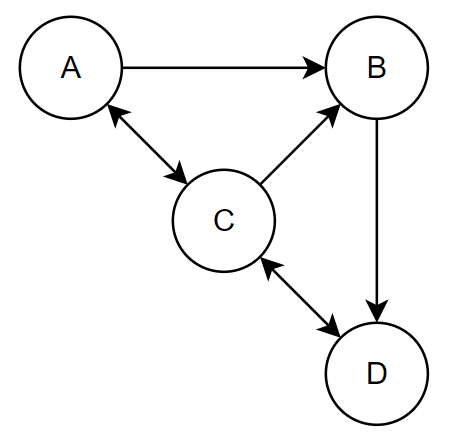

- At iteration 0, all A, B, C and D PageRank is 1/N = 1/4

- At iteration 1:
    - A: $PR(A)=\frac{\frac{1}{4}}{3}=\frac{1}{12}$ (only C points to A, so we take PG(C,0) divided by outgoing links of C).

    - B: $PR(B)=\frac{\frac{1}{4}}{2}+\frac{\frac{1}{4}}{3}=\frac{5}{24}$ (only A and C point to B).

    - C: $PR(C)=\frac{\frac{1}{4}}{2}+\frac{\frac{1}{4}}{1}=\frac{3}{8}$ (only A and D point to C).

    - D: $PR(D)=\frac{\frac{1}{4}}{3}+\frac{\frac{1}{4}}{1}=\frac{1}{3}$ (only B and C point to D).


- Continue iteration 2, we will have:

| |Iteration 0|Iteration 1|Iteration 2|PageRank|
|-|-----------|-----------|-----------|--------|
|A|1/4        |1/12       |1/8        |1       |
|B|1/4        |5/24       |1/6        |2       |
|C|1/4        |3/8        |3/8        |4       |
|D|1/4        |1/3        |1/3        |3       |

---

### Other Graph Features

#### Shortest path

- The concept of shortest path is commonly used in link prediction to assess the potential strength or likelihood of a future connection between two nodes in a network. The shortest path represents the minimum number of edges or steps required to travel from one node to another.

#### Adamic/Adar Index

- It was proposed by Lada Adamic and Eytan Adar (2003)
- In addition to counting the number of common neighbors, the Adamic Adar measure involves summing the logarithmic inverses of the degrees of the common neighbors.
- The Adamic-Adar measure is based on the concept that common elements with very large neighbourhoods are less significant when predicting a connection between two nodes compared with elements shared between a small number of nodes.

$$adamicAdar(u,v)=\sum_{z\in N(u)\cap N(v)}^{}\frac{1}{log(N(z))}$$

*Example: Consider this graph, calculate adamicAdar for (A,C)*

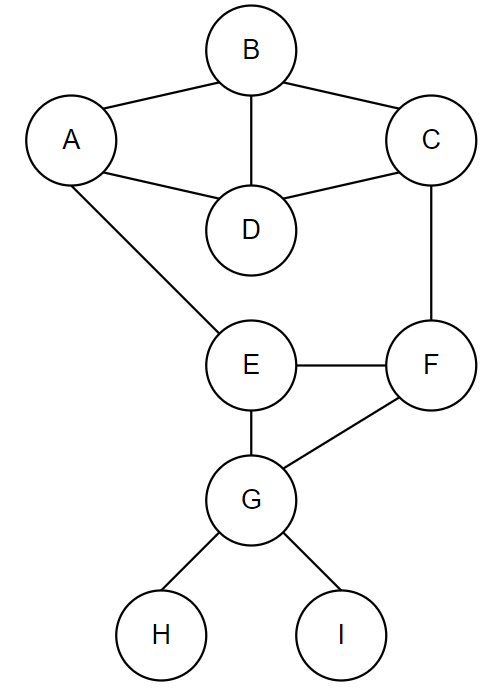

(A,C) common neighbors are B and D. B and D has deegree 3.

$$adamicAdar(u,v)=\frac{1}{log(3)}+\frac{1}{log(3)}=1.82$$

#### Katz Centrality

- Katz centrality calculates the centrality of a node by considering the centrality of its neighboring nodes. It is an extension of the eigenvector centrality measure. The Katz centrality score for a node i can be defined as follows:

$$x_i = \alpha \sum_j A_{ij} x_j + \beta$$
- Where A is the adjacency matrix of the graph G with eigenvalues λ. The parameter β controls the initial centrality and $\alpha < \frac{1}{\lambda_{max}}$

#### Hits Score

The HITS (Hyperlink-Induced Topic Search) algorithm calculates two scores for each node: authority and hub. The authority score estimates the importance of a node based on its incoming links, while the hub score estimates its value based on its outgoing links. By considering both the authority and hub scores, the HITS algorithm provides a comprehensive assessment of a node's relevance and connectivity within a network.

---

### Featuriztion

#### Weight Features

- To determine the similarity of nodes, the author calculated edge weights between nodes. The edge weight decreases as the count of neighbors increases.

$$W=\frac{1}{\sqrt{1+\left| X \right|}}$$
- As the graph is directed, the weighted in and weighted out values were calculated differently.

- The author added some new weight features using weighted edge:
    - weight of incoming edges
    - weight of outgoing edges
    - weight of incoming edges + weight of outgoing edges
    - weight of incoming edges * weight of outgoing edges
    - 2*weight of incoming edges + weight of outgoing edges
    - weight of incoming edges + 2*weight of outgoing edges

---

###  Evaluation metrics

#### F1 Score

- The F1 score is a metric commonly used to evaluate the performance of a binary classification model. It combines precision and recall into a single measure that balances both metrics.

$$\frac{2\times Precision\times Recall}{Precision+Recall}$$

- Precision represents the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives). It measures the accuracy of positive predictions.

$$Precision=\frac{TP}{TP+FP}$$

- Recall, also known as sensitivity or true positive rate, represents the proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives). It measures the completeness or coverage of positive predictions.

$$Recall=\frac{TP}{TP+FN}$$

- A higher F1 score indicates better overall performance, with values ranging from 0 to 1, where 1 represents perfect precision and recall.

#### AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve

- AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.

- A higher AUC indicates a better model performance in accurately predicting instances of class 0 as 0 and instances of class 1 as 1.

- The ROC curve represents pairs of (TPR, FPR) values where TPR is on the y-axis and FPR is on the x-axis.
    - $TPR=\frac{TP}{TP+FN}$
    - $FPR=\frac{FP}{TN+FP}$

- A highly effective model achieves an AUC value close to 1, indicating a strong measure of separability. On the other hand, a poorly performing model has an AUC value close to 0, indicating the worst measure of separability and a limited ability to differentiate between the classes.

---

## Part 2+3: Explain and run code

Import neccesary librabries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb
import pandas as pd
import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm

- If train_woheader.csv does not exist, read file train.csv, performs some data analysis operations (checking for missing values, checking for duplicates), saves the modified DataFrame as a new CSV file, and print informative statements along the way.
- Else if train_woheader.csv already exists, read edge list (directed graph) of it and print info (nodes and edges)
- We get a directed graph with 1862220 nodes and 9437519 edges

In [2]:
#reading graph
if not os.path.isfile('data/after_eda/train_woheader.csv'):
    traincsv = pd.read_csv('data/train.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print("Number of diplicate entries: ",sum(traincsv.duplicated()))
    traincsv.to_csv('data/after_eda/train_woheader.csv',header=False,index=False)
    print("saved the graph into file")
else:
    g=nx.read_edgelist('data/after_eda/train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(g))

DiGraph with 1862220 nodes and 9437519 edges


- Check if train_woheader_sample.csv exists, if not, creates a sample file train_woheader_sample.csv (50 rows) from train.csv. Then use train_woheader_sample.csv to visualize the graph and save the graph. Finally, print info of it (66 nodes and 50 edges because we use 50 rows).

DiGraph with 66 nodes and 50 edges


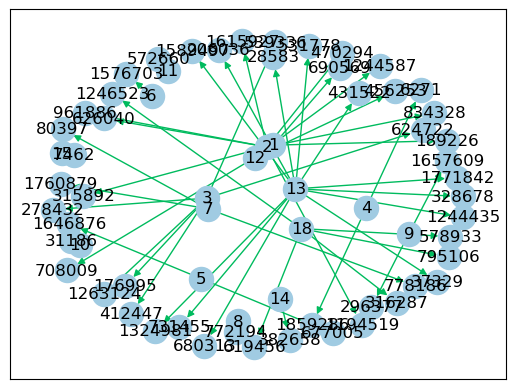

In [3]:
if not os.path.isfile('train_woheader_sample.csv'):
    pd.read_csv('data/train.csv', nrows=50).to_csv('train_woheader_sample.csv',header=False,index=False)
    
subgraph=nx.read_edgelist('train_woheader_sample.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
# https://stackoverflow.com/questions/9402255/drawing-a-huge-graph-with-networkx-and-matplotlib

pos=nx.spring_layout(subgraph)
nx.draw_networkx(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

### 1. Exploratory Data Analysis

- In this section, the author analyze and visualize some information like number of unique person, number of followers for each person, number of people each person following and sum of both.

- Calculate number of nodes (The number of unique persons) = 1862220

In [4]:
# No of Unique persons 
print("The number of unique persons",len(g.nodes()))

The number of unique persons 1862220


### 1.1 No of followers for each person

- Show a distribution of followers

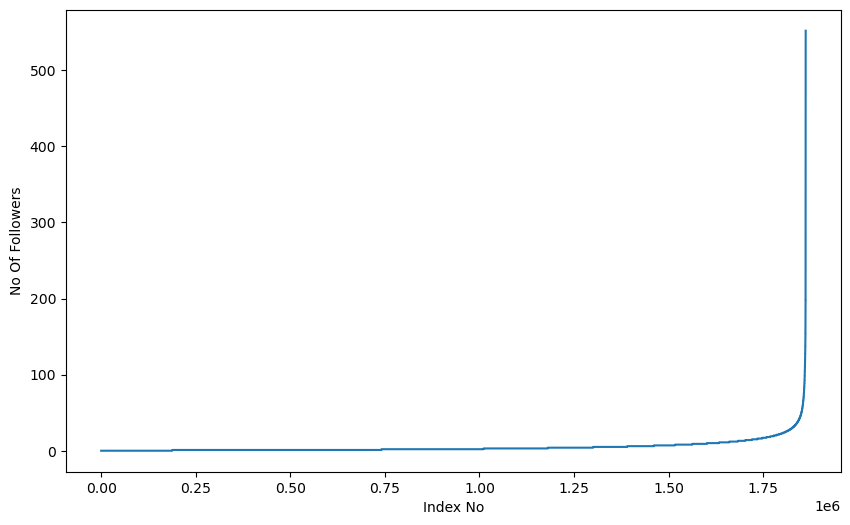

In [5]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

- Show a distribution of follower but using only 1500000 elements

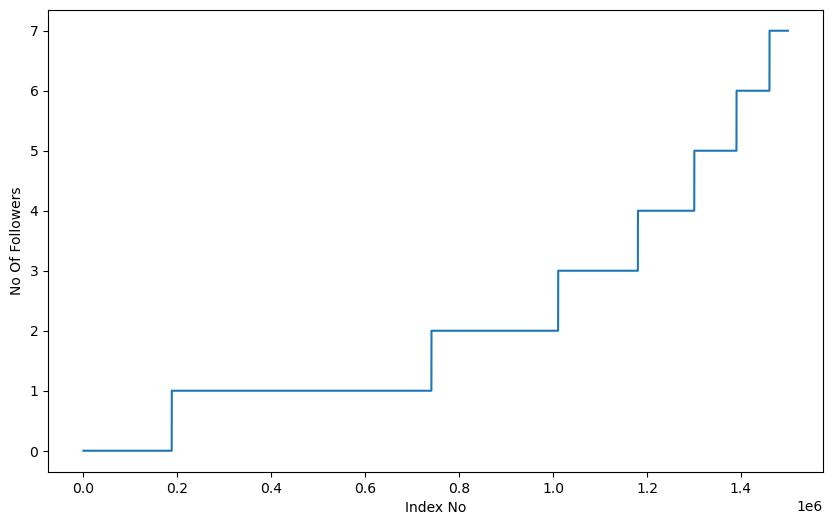

In [6]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

- Draw boxplot

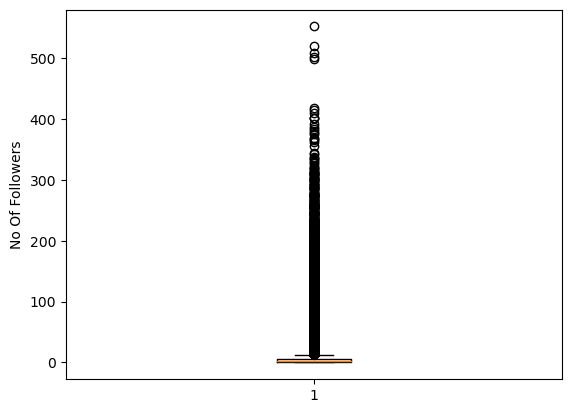

In [7]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of Followers')
plt.show()

In [8]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


- 99% people have 40 followers only

In [9]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


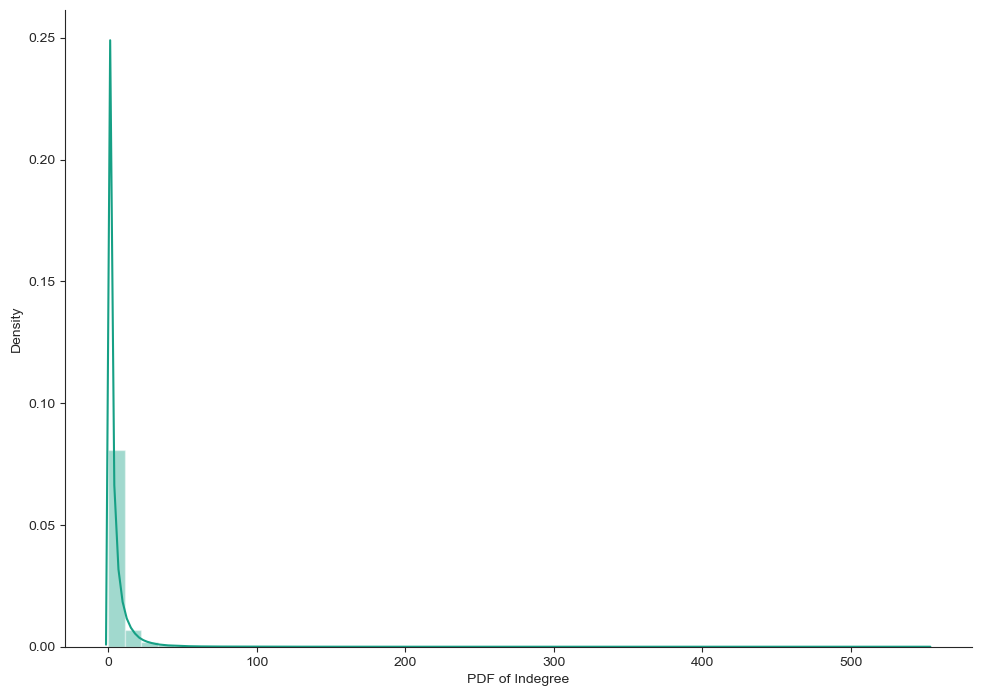

In [10]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

## 1.2 No of people each person is following

- Ploting like 1.1

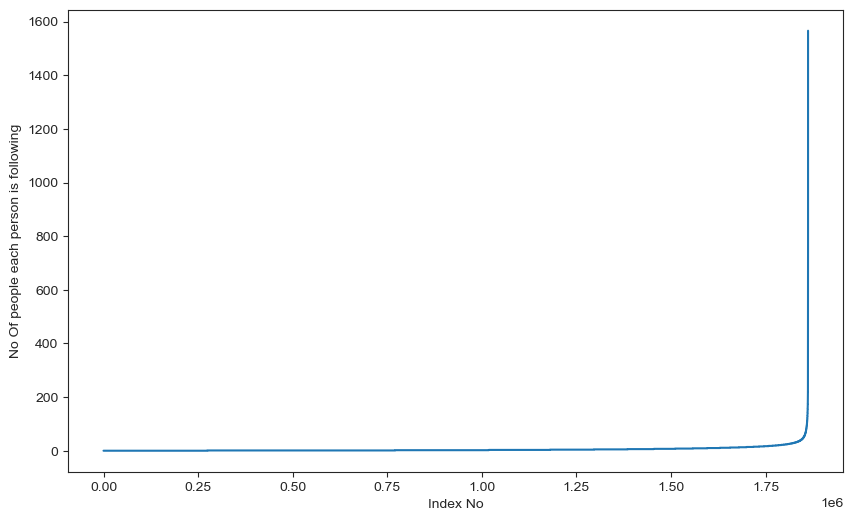

In [11]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

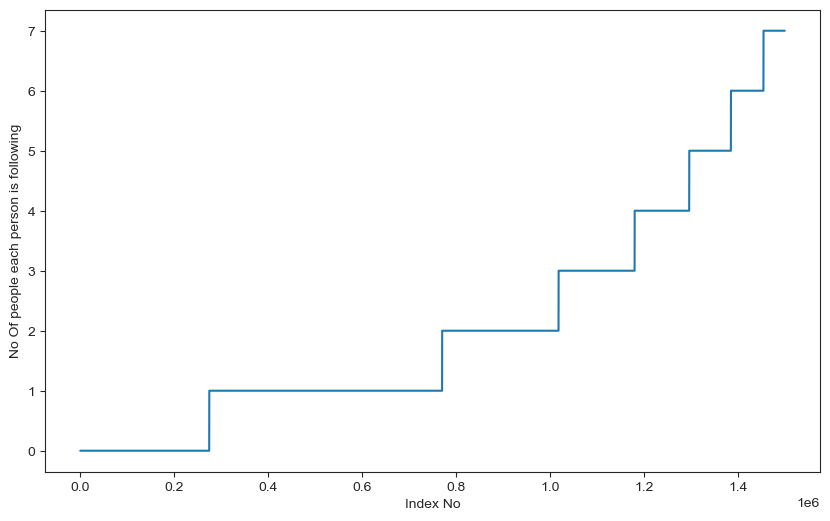

In [12]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

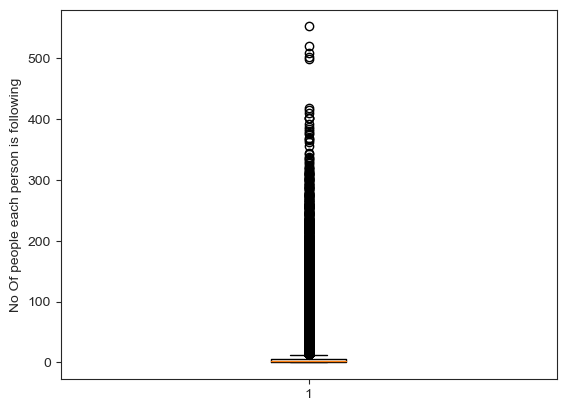

In [13]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of people each person is following')
plt.show()

In [14]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


- 90% of people follow 40 people.

In [15]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


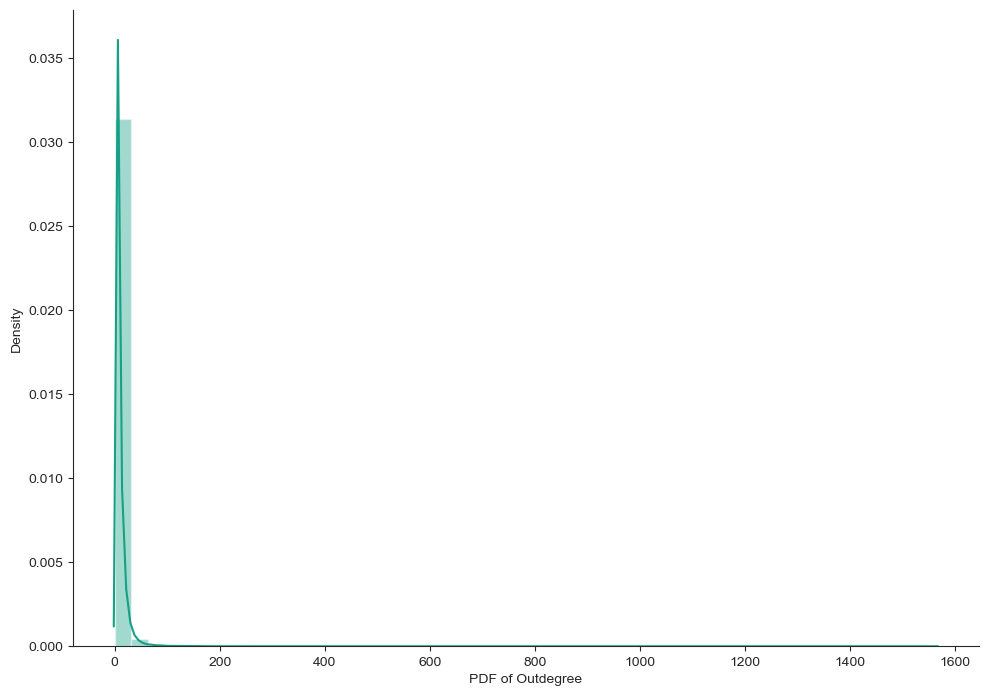

In [16]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

In [17]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )

No of persons those are not following anyone are 274512 and % is 14.741115442858524


- Just a small number

In [18]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 188043 and % is 10.097786512871734


- Just a small number

In [19]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0 :
        if len(list(g.successors(i)))==0:
            count+=1
print('No of persons those are not not following anyone and also not having any followers are',count)

No of persons those are not not following anyone and also not having any followers are 0


- All people in this Facebook data are active, look like no clone or bot accounts.

## 1.3 both followers + following 

- Plot like 1.1

In [20]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

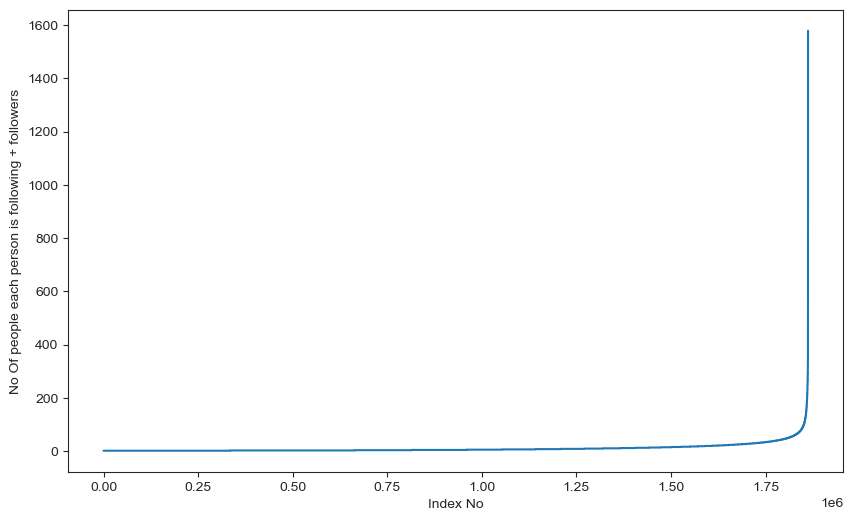

In [21]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

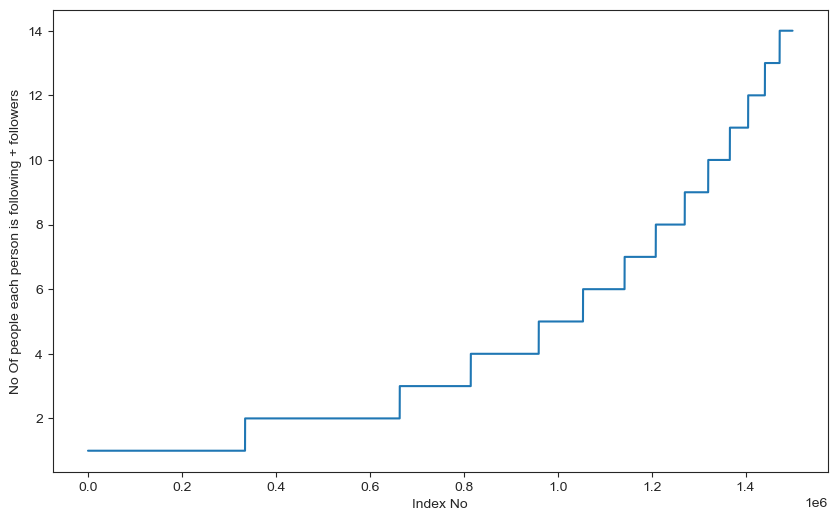

In [22]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [23]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [24]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [25]:
print('Min of no of followers + following is',in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()),' persons having minimum no of followers + following')

Min of no of followers + following is 1
334291  persons having minimum no of followers + following


In [26]:
print('Max of no of followers + following is',in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()),' persons having maximum no of followers + following')

Max of no of followers + following is 1579
1  persons having maximum no of followers + following


In [27]:
print('No of persons having followers + following less than 10 are',np.sum(in_out_degree<10))

No of persons having followers + following less than 10 are 1320326


- Most of people are in this group

In [28]:
print('No of weakly connected components',len(list(nx.weakly_connected_components(g))))
count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes',count)

No of weakly connected components 45558
weakly connected components wit 2 nodes 32195


# 2. Posing a problem as classification problem 

## 2.1 Generating some edges which are not present in graph for supervised learning

- This code generates a set of bad links. It randomly generate varialbe a and b (from 1 to 1862220) and checks if the length of shortest path between them is greater than 2. If so, it adds the edge to the missing_edges set. The set of bad links is then saved to a file or loaded from a file if it already exists.

In [29]:
%%time
###generating bad edges from given graph
import random
if not os.path.isfile('data/after_eda/missing_edges_final.p'):
    #getting all set of edges
    r = csv.reader(open('data/after_eda/train_woheader.csv','r'))
    edges = dict()
    for edge in r:
        edges[(edge[0], edge[1])] = 1
        
        
    missing_edges = set([])
    while (len(missing_edges)<9437519):
        a=random.randint(1, 1862220)
        b=random.randint(1, 1862220)
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
            try:
                if nx.shortest_path_length(g,source=a,target=b) > 2: 

                    missing_edges.add((a,b))
                else:
                    continue  
            except:  
                    missing_edges.add((a,b))              
        else:
            continue
    pickle.dump(missing_edges,open('data/after_eda/missing_edges_final.p','wb'))
else:
    missing_edges = pickle.load(open('data/after_eda/missing_edges_final.p','rb'))

CPU times: total: 2h 41min 13s
Wall time: 6h 25min 2s


- I ran this on my computer and it took a lot of time

In [30]:
len(missing_edges)

9437519

## 2.2 Training and Test data split
Removed edges from Graph and used as test data and after removing used that graph for creating features for Train and test data

- This code splits the positive and negative link data into training and testing sets with ratio 80:20, and saves them to separate CSV files for further analysis and modeling.

In [31]:
from sklearn.model_selection import train_test_split
if (not os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and (not os.path.isfile('data/after_eda/test_pos_after_eda.csv')):
    #reading total data df
    df_pos = pd.read_csv('data/train.csv')
    df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    
    print("Number of nodes in the graph with edges", df_pos.shape[0])
    print("Number of nodes in the graph without edges", df_neg.shape[0])
    
    #Trian test split 
    #Spiltted data into 80-20 
    #positive links and negative links seperatly because we need positive training data only for creating graph 
    #and for feature generation
    X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
    
    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])

    #removing header and saving
    X_train_pos.to_csv('data/after_eda/train_pos_after_eda.csv',header=False, index=False)
    X_test_pos.to_csv('data/after_eda/test_pos_after_eda.csv',header=False, index=False)
    X_train_neg.to_csv('data/after_eda/train_neg_after_eda.csv',header=False, index=False)
    X_test_neg.to_csv('data/after_eda/test_neg_after_eda.csv',header=False, index=False)
else:
    #Graph from Traing data only 
    del missing_edges

Number of nodes in the graph with edges 9437519
Number of nodes in the graph without edges 9437519
Number of nodes in the train data graph with edges 7550015 = 7550015
Number of nodes in the train data graph without edges 7550015 = 7550015
Number of nodes in the test data graph with edges 1887504 = 1887504
Number of nodes in the test data graph without edges 1887504 = 1887504


- This code reads the train and test of positive links from CSV files, creates directed graphs using NetworkX. Then it calculates the number of people common in both train and test set, the number of people present in the train set but not present in the test set and the number of people present in the test set but not present in the train set.
- Finally, the code prints number of 3 variable named above and percentage of people not in Train but exist in Test.

In [32]:
if (os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and (os.path.isfile('data/after_eda/test_pos_after_eda.csv')):        
    train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('data/after_eda/test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',trY_teY)
    print('no of people present in train but not present in test -- ',trY_teN)

    print('no of people present in test but not present in train -- ',teY_trN)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

DiGraph with 1780722 nodes and 7550015 edges
DiGraph with 1144623 nodes and 1887504 edges
no of people common in train and test --  1063125
no of people present in train but not present in test --  717597
no of people present in test but not present in train --  81498
 % of people not there in Train but exist in Test in total Test data are 7.1200735962845405 %


- The author noticed that there is a cold start problem. This code creates the final train and test data sets by merging the positive and negative link data sets. It saves these data sets to separate CSV files for future use in modeling and analysis.
- The code also prints some info about train and test set.

In [33]:
#final train and test data sets
if (not os.path.isfile('data/after_eda/train_after_eda.csv')) and \
(not os.path.isfile('data/after_eda/test_after_eda.csv')) and \
(not os.path.isfile('data/train_y.csv')) and \
(not os.path.isfile('data/test_y.csv')) and \
(os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and \
(os.path.isfile('data/after_eda/test_pos_after_eda.csv')) and \
(os.path.isfile('data/after_eda/train_neg_after_eda.csv')) and \
(os.path.isfile('data/after_eda/test_neg_after_eda.csv')):
    
    X_train_pos = pd.read_csv('data/after_eda/train_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv('data/after_eda/test_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv('data/after_eda/train_neg_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv('data/after_eda/test_neg_after_eda.csv', names=['source_node', 'destination_node'])

    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

    X_train = X_train_pos.append(X_train_neg,ignore_index=True)
    y_train = np.concatenate((y_train_pos,y_train_neg))
    X_test = X_test_pos.append(X_test_neg,ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
    X_train.to_csv('data/after_eda/train_after_eda.csv',header=False,index=False)
    X_test.to_csv('data/after_eda/test_after_eda.csv',header=False,index=False)
    pd.DataFrame(y_train.astype(int)).to_csv('data/train_y.csv',header=False,index=False)
    pd.DataFrame(y_test.astype(int)).to_csv('data/test_y.csv',header=False,index=False)

Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


- This codes print out shape of X_train, X_test, y_train, y_test

In [34]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100030, 2)
Data points in test data (3775008, 2)
Shape of traget variable in train (15100030,)
Shape of traget variable in test (3775008,)


## 2. Similarity measures

- I have already mentioned these 2 similarity measures in Part 1.

### 2.1 Jaccard Distance

In [35]:
#for followees
def jaccard_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim

In [36]:
#one test case
print(jaccard_for_followees(273084,1505602))

0.0


In [37]:
#node 1635354 not in graph 
print(jaccard_for_followees(273084,1505602))

0.0


In [38]:
#for followers
def jaccard_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                 (len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [39]:
print(jaccard_for_followers(273084,470294))

0.0


In [40]:
#node 1635354 not in graph 
print(jaccard_for_followees(669354,1635354))

0


### 2.2 Cosine distance

In [41]:
#for followees
def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0

In [42]:
print(cosine_for_followees(273084,1505602))

0.0


In [43]:
print(cosine_for_followees(273084,1635354))

0


In [44]:
def cosine_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [45]:
print(cosine_for_followers(2,470294))

0.02886751345948129


In [46]:
print(cosine_for_followers(669354,1635354))

0


## 3. Ranking Measures

### 3.1 Page Ranking

- This code checks if the PageRank values for the nodes in the train_graph have been previously calculated and saved. If not, it calculates the PageRank values and saves them to a file. If the PageRank values have already been calculated and saved, it loads them from the file. This allows for reusing the calculated PageRank values without recalculating them every time the code is run, saving time and resources.

In [47]:
if not os.path.isfile('data/fea_sample/page_rank.p'):
    pr = nx.pagerank(train_graph, alpha=0.85)
    pickle.dump(pr,open('data/fea_sample/page_rank.p','wb'))
else:
    pr = pickle.load(open('data/fea_sample/page_rank.p','rb'))

- Print min, max and mean of PageRank values

In [48]:
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))

min 1.6556497245737814e-07
max 2.709825134193587e-05
mean 5.615699699389075e-07


- Mean PageRank

In [49]:
#for imputing to nodes which are not there in Train data
mean_pr = float(sum(pr.values())) / len(pr)
print(mean_pr)

5.615699699389075e-07


## 4. Other Graph Features

### 4.1 Shortest path:

- To find the shortest path between two nodes, we first check if there is a direct path connecting them. If such a direct path exists, we remove that edge and calculate the path.

In [50]:
#if has direct edge then deleting that edge and calculating shortest path
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

In [51]:
#testing
compute_shortest_path_length(77697, 826021)

10

In [52]:
#testing
compute_shortest_path_length(669354,1635354)

-1

### 4.2 Checking for same community

- The code checks if two nodes belong to the same weakly connected component in the train_graph. If there is an edge between the nodes, it temporarily removes the edge and checks if there is still a path between them. If there is no edge, it directly checks if the nodes belong to the same component. The function returns 1 if they belong to the same component and 0 otherwise.

In [53]:
#getting weekly connected edges from graph 
wcc=list(nx.weakly_connected_components(train_graph))
def belongs_to_same_wcc(a,b):
    index = []
    if train_graph.has_edge(b,a):
        return 1
    if train_graph.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                train_graph.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    train_graph.add_edge(a,b)
                    return 0
                else:
                    train_graph.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

In [54]:
belongs_to_same_wcc(861, 1659750)

0

In [55]:
belongs_to_same_wcc(669354,1635354)

0

### 4.3 Adamic/Adar Index

- I have already mentioned this in Part 1

In [56]:
#adar index
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

In [57]:
calc_adar_in(1,189226)

0

In [58]:
calc_adar_in(669354,1635354)

0

### 4.4 Is persion was following back

- Check if a person you follow follows you back

In [59]:
def follows_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

In [60]:
follows_back(1,189226)

1

In [61]:
follows_back(669354,1635354)

0

### 4.5 Katz Centrality

- I have already mentioned in Part 1

In [62]:
if not os.path.isfile('data/fea_sample/katz.p'):
    katz = nx.katz.katz_centrality(train_graph,alpha=0.005,beta=1)
    pickle.dump(katz,open('data/fea_sample/katz.p','wb'))
else:
    katz = pickle.load(open('data/fea_sample/katz.p','rb'))

In [63]:
print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean',float(sum(katz.values())) / len(katz))

min 0.0007313532484055976
max 0.0033945549816945084
mean 0.0007483800935553942


In [64]:
mean_katz = float(sum(katz.values())) / len(katz)
print(mean_katz)

0.0007483800935553942


### 4.6 Hits Score

- I have already mentioned in Part 1

In [65]:
if not os.path.isfile('data/fea_sample/hits.p'):
    hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
    pickle.dump(hits,open('data/fea_sample/hits.p','wb'))
else:
    hits = pickle.load(open('data/fea_sample/hits.p','rb'))

In [66]:
print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))

min -1.4157151894374797e-20
max 0.004868653379538985
mean 5.615699699308675e-07


## 5. Featurization

### 5. 1 Reading a sample of Data from both train and test

- This code creates a subset sample from data/after_eda/train_after_eda.csv and data/after_eda/test_after_eda.csv

In [67]:
import random
if os.path.isfile('data/after_eda/train_after_eda.csv'):
    filename = "data/after_eda/train_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 15100030
    # n_train = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_train =  15100028
    s = 100000 #desired sample size
    skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))
    #https://stackoverflow.com/a/22259008/4084039

In [68]:
if os.path.isfile('data/after_eda/train_after_eda.csv'):
    filename = "data/after_eda/test_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 3775008
    # n_test = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_test = 3775006
    s = 50000 #desired sample size
    skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))
    #https://stackoverflow.com/a/22259008/4084039

- Print number of rows in train, test file and skip_train, skip_test

In [69]:
print("Number of rows in the train data file:", n_train)
print("Number of rows we are going to elimiate in train data are",len(skip_train))
print("Number of rows in the test data file:", n_test)
print("Number of rows we are going to elimiate in test data are",len(skip_test))

Number of rows in the train data file: 15100028
Number of rows we are going to elimiate in train data are 15000028
Number of rows in the test data file: 3775006
Number of rows we are going to elimiate in test data are 3725006


- The code reads 2 csv files after_eda/train_after_eda.csv and data/after_eda/test_after_eda.csv. It also creates "indicator_link" collumn for both df by reading from train_y.csv and test_y.csv

In [70]:
df_final_train = pd.read_csv('data/after_eda/train_after_eda.csv', skiprows=skip_train, names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('data/train_y.csv', skiprows=skip_train, names=['indicator_link'])
print("Our train matrix size ",df_final_train.shape)
df_final_train.head(2)

Our train matrix size  (100002, 3)


,source_node,destination_node,indicator_link
0,273084,1505602,1
1,1445857,1277246,1


In [71]:
df_final_test = pd.read_csv('data/after_eda/test_after_eda.csv', skiprows=skip_test, names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('data/test_y.csv', skiprows=skip_test, names=['indicator_link'])
print("Our test matrix size ",df_final_test.shape)
df_final_test.head(2)

Our test matrix size  (50002, 3)


,source_node,destination_node,indicator_link
0,848424,784690,1
1,1740122,1366273,1


### 5.2 Adding a set of features

- This code adds new features for both above train and test DataFrame
    - jaccard_followers
    - jaccard_followees
    - cosine_followers
    - cosine_followees
    - num_followers_s
    - num_followees_s
    - num_followers_d
    - num_followees_d
    - inter_followers
    - inter_followees

In [72]:
if not os.path.isfile('data/fea_sample/storage_sample_stage1.h5'):
    #mapping jaccrd followers to train and test data
    df_final_train['jaccard_followers'] = df_final_train.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['jaccard_followers'] = df_final_test.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccrd followees to train and test data
    df_final_train['jaccard_followees'] = df_final_train.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['jaccard_followees'] = df_final_test.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    

        #mapping jaccrd followers to train and test data
    df_final_train['cosine_followers'] = df_final_train.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['cosine_followers'] = df_final_test.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccrd followees to train and test data
    df_final_train['cosine_followees'] = df_final_train.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['cosine_followees'] = df_final_test.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)

- This code calculates number of followers, followees for source and destination and intersection of followers and followees for source and destination.

In [73]:
def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees

- This code checks if an HDF5 file exists. If it does not exist, it uses compute_features_stage1 function for the train and test dataframes (df_final_train and df_final_test) and stores them in the HDF5 file. If the file already exists, it reads the dataframes from the HDF5 file

In [77]:
if not os.path.isfile('data/fea_sample/storage_sample_stage1.h5'):
    df_final_train['num_followers_s'], df_final_train['num_followers_d'], \
    df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
    df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)
    
    df_final_test['num_followers_s'], df_final_test['num_followers_d'], \
    df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
    df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)
    
    hdf = HDFStore('data/fea_sample/storage_sample_stage1.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('data/fea_sample/storage_sample_stage1.h5', 'train_df',mode='r')
    df_final_test = read_hdf('data/fea_sample/storage_sample_stage1.h5', 'test_df',mode='r')

### 5.3 Adding new set of features

- This code creates each of these features for both train and test data points
    - adar index
    - is following back
    - belongs to same weakly connect components
    - shortest path between source and destination
- Then it stores them in an HDF5 file. If the file already exists, it reads the dataframes from the HDF5 file.

In [78]:
if not os.path.isfile('data/fea_sample/storage_sample_stage2.h5'):
    #mapping adar index on train
    df_final_train['adar_index'] = df_final_train.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
    #mapping adar index on test
    df_final_test['adar_index'] = df_final_test.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping followback or not on train
    df_final_train['follows_back'] = df_final_train.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #mapping followback or not on test
    df_final_test['follows_back'] = df_final_test.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping same component of wcc or not on train
    df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

    ##mapping same component of wcc or not on train
    df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)
    
    #--------------------------------------------------------------------------------------------------------
    #mapping shortest path on train 
    df_final_train['shortest_path'] = df_final_train.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
    #mapping shortest path on test
    df_final_test['shortest_path'] = df_final_test.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)

    hdf = HDFStore('data/fea_sample/storage_sample_stage2.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('data/fea_sample/storage_sample_stage2.h5', 'train_df',mode='r')
    df_final_test = read_hdf('data/fea_sample/storage_sample_stage2.h5', 'test_df',mode='r')

### 5.4 Adding new set of features

- It creates these features for both train and test data points
    - Weight Features
        - weight of incoming edges
        - weight of outgoing edges
        - weight of incoming edges + weight of outgoing edges
        - weight of incoming edges * weight of outgoing edges
        - 2*weight of incoming edges + weight of outgoing edges
        - weight of incoming edges + 2*weight of outgoing edges
    - Page Ranking of source
    - Page Ranking of dest
    - katz of source
    - katz of dest
    - hubs of source
    - hubs of dest
    - authorities_s of source
    - authorities_s of dest

- Weight feature has been mentioned in Part 1

In [79]:
#weight for source and destination of each link
Weight_in = {}
Weight_out = {}
for i in  tqdm(train_graph.nodes()):
    s1=set(train_graph.predecessors(i))
    w_in = 1.0/(np.sqrt(1+len(s1)))
    Weight_in[i]=w_in
    
    s2=set(train_graph.successors(i))
    w_out = 1.0/(np.sqrt(1+len(s2)))
    Weight_out[i]=w_out
    
#for imputing with mean
mean_weight_in = np.mean(list(Weight_in.values()))
mean_weight_out = np.mean(list(Weight_out.values()))

100%|██████████| 1780722/1780722 [00:14<00:00, 126699.48it/s]


In [80]:
if not os.path.isfile('data/fea_sample/storage_sample_stage3.h5'):
    #mapping to pandas train
    df_final_train['weight_in'] = df_final_train.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_train['weight_out'] = df_final_train.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))

    #mapping to pandas test
    df_final_test['weight_in'] = df_final_test.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_test['weight_out'] = df_final_test.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))


    #some features engineerings on the in and out weights
    df_final_train['weight_f1'] = df_final_train.weight_in + df_final_train.weight_out
    df_final_train['weight_f2'] = df_final_train.weight_in * df_final_train.weight_out
    df_final_train['weight_f3'] = (2*df_final_train.weight_in + 1*df_final_train.weight_out)
    df_final_train['weight_f4'] = (1*df_final_train.weight_in + 2*df_final_train.weight_out)

    #some features engineerings on the in and out weights
    df_final_test['weight_f1'] = df_final_test.weight_in + df_final_test.weight_out
    df_final_test['weight_f2'] = df_final_test.weight_in * df_final_test.weight_out
    df_final_test['weight_f3'] = (2*df_final_test.weight_in + 1*df_final_test.weight_out)
    df_final_test['weight_f4'] = (1*df_final_test.weight_in + 2*df_final_test.weight_out)

In [81]:
if not os.path.isfile('data/fea_sample/storage_sample_stage3.h5'):
    
    #page rank for source and destination in Train and Test
    #if anything not there in train graph then adding mean page rank 
    df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

    df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))
    #================================================================================

    #Katz centrality score for source and destination in Train and test
    #if anything not there in train graph then adding mean katz score
    df_final_train['katz_s'] = df_final_train.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_train['katz_d'] = df_final_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

    df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))
    #================================================================================

    #Hits algorithm score for source and destination in Train and test
    #if anything not there in train graph then adding 0
    df_final_train['hubs_s'] = df_final_train.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_train['hubs_d'] = df_final_train.destination_node.apply(lambda x: hits[0].get(x,0))

    df_final_test['hubs_s'] = df_final_test.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_test['hubs_d'] = df_final_test.destination_node.apply(lambda x: hits[0].get(x,0))
    #================================================================================

    #Hits algorithm score for source and destination in Train and Test
    #if anything not there in train graph then adding 0
    df_final_train['authorities_s'] = df_final_train.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_train['authorities_d'] = df_final_train.destination_node.apply(lambda x: hits[1].get(x,0))

    df_final_test['authorities_s'] = df_final_test.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_test['authorities_d'] = df_final_test.destination_node.apply(lambda x: hits[1].get(x,0))
    #================================================================================

    hdf = HDFStore('data/fea_sample/storage_sample_stage3.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('data/fea_sample/storage_sample_stage3.h5', 'train_df',mode='r')
    df_final_test = read_hdf('data/fea_sample/storage_sample_stage3.h5', 'test_df',mode='r')

### 5.5 Adding new set of features

- This code creates these features for both train and test data points:
    - SVD features for both source and destination

- Then it stores in storage_sample_stage4.h5 file

In [82]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [83]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [84]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [85]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 6)
V Shape (6, 1780722)
s Shape (6,)


In [86]:
if not os.path.isfile('data/fea_sample/storage_sample_stage4.h5'):
    #===================================================================================================
    
    df_final_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_train.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    #===================================================================================================
    
    df_final_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_train.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================
    
    df_final_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_test.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)

    #===================================================================================================
    
    df_final_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_test.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================

    hdf = HDFStore('data/fea_sample/storage_sample_stage4.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()

---

- Import neccesary librabries

In [87]:
import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

- Read edge list of train_pos_after_eda.csv, then print it's info

In [88]:
if os.path.isfile('data/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

DiGraph with 1780722 nodes and 7550015 edges


- This code reads storage_sample_stage4.h5 and storage_sample_stage4.h5 and turn them into DataFrame

In [89]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [90]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [91]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [92]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

- This code trains multiple RandomForestClassifier models with different numbers of estimators at depth 5 and calculates the F1 scores on the training and test sets. It then generates a plot to visualize how the number of estimators affects the scores, helping to evaluate the model's performance.

Estimators = 10 Train Score 0.9285506342274901 Test Score 0.9088255821331135
Estimators = 50 Train Score 0.9276184122748499 Test Score 0.9056916090148975
Estimators = 100 Train Score 0.9272693141998999 Test Score 0.916498571188435
Estimators = 250 Train Score 0.9253532419121399 Test Score 0.9146584450177226
Estimators = 450 Train Score 0.9268251999040878 Test Score 0.9162588477452689


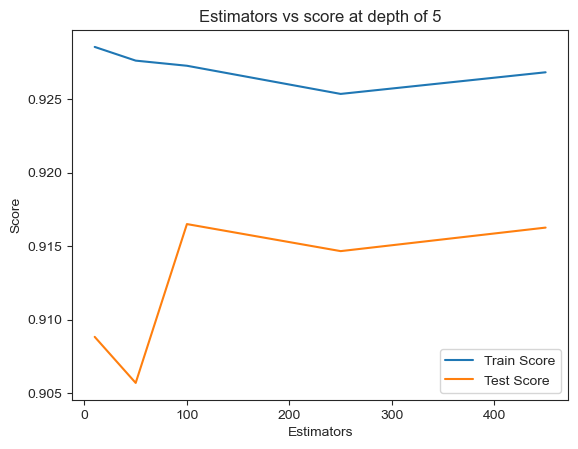

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

estimators = [10,50,100,250,450]
train_scores = []
test_scores = []

for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1, random_state=25, verbose=0, warm_start=False)
    clf.fit(df_final_train, y_train)
    train_sc = f1_score(y_train, clf.predict(df_final_train))
    test_sc = f1_score(y_test, clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators =', i, 'Train Score', train_sc, 'Test Score', test_sc)

plt.plot(estimators, train_scores, label='Train Score')
plt.plot(estimators, test_scores, label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')
plt.legend()
plt.show()

- This code trains multiple RandomForestClassifier models with different maximum depths and calculates the F1 scores on the training and test sets. It then generates a plot to visualize how the depth of the decision trees affects the scores, helping to evaluate the model's performance.

Depth = 3 Train Score 0.8996158096942266 Test Score 0.8675465166594548
Depth = 9 Train Score 0.9608979517004654 Test Score 0.9209571235651588
Depth = 11 Train Score 0.9625973078170613 Test Score 0.9213426432236898
Depth = 15 Train Score 0.9657781599312123 Test Score 0.9224011097566103
Depth = 20 Train Score 0.9660495700556399 Test Score 0.9227245987057736
Depth = 35 Train Score 0.9657782364964687 Test Score 0.9225628848214849
Depth = 50 Train Score 0.9657782364964687 Test Score 0.9225628848214849
Depth = 70 Train Score 0.9657782364964687 Test Score 0.9225628848214849
Depth = 130 Train Score 0.9657782364964687 Test Score 0.9225628848214849


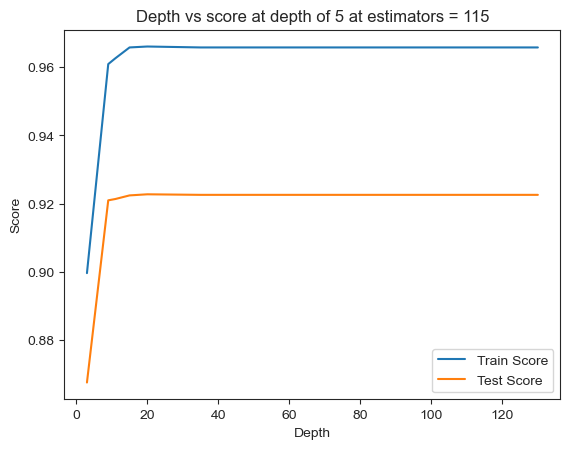

In [94]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []

for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1, random_state=25, verbose=0, warm_start=False)
    clf.fit(df_final_train, y_train)
    train_sc = f1_score(y_train, clf.predict(df_final_train))
    test_sc = f1_score(y_test, clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Depth =', i, 'Train Score', train_sc, 'Test Score', test_sc)

plt.plot(depths, train_scores, label='Train Score')
plt.plot(depths, test_scores, label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.legend()
plt.show()

- This code performs a random search on the RandomForestClassifier model, exploring different combinations of hyperparameters within specified ranges. It fits the model on the training data and evaluates the performance using cross-validation. The mean test scores and mean train scores are then printed to assess the performance of the model with different hyperparameter settings.

In [95]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25, return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96488423 0.96411477 0.96203652 0.9641077  0.96576656]
mean train scores [0.96567567 0.96462517 0.96259186 0.96462091 0.96704587]


In [96]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [98]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [99]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [100]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9672923229642535
Test f1 score 0.9234236131586706


- This code plots confusion matrix

In [101]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


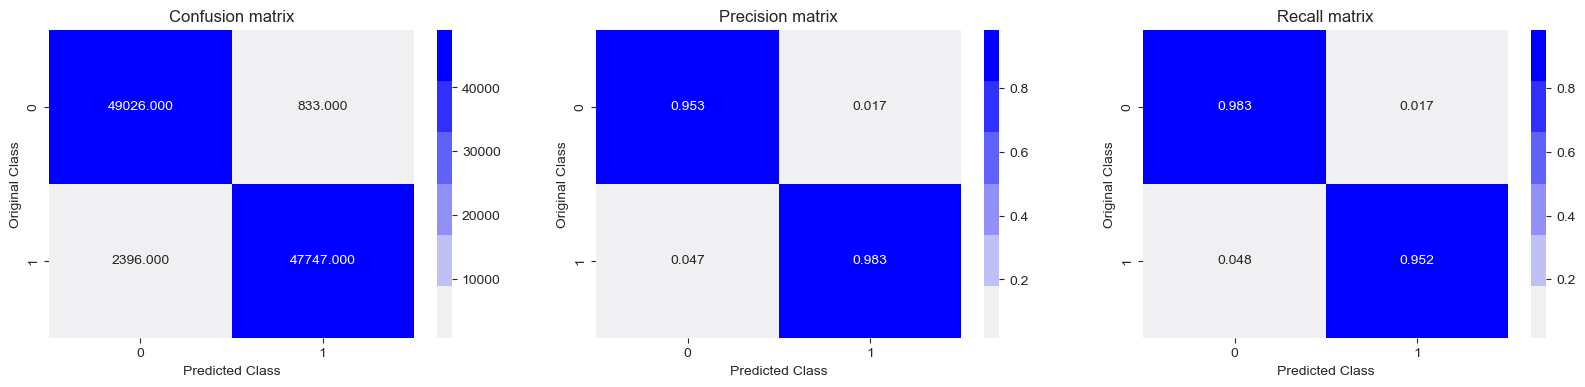

Test confusion_matrix


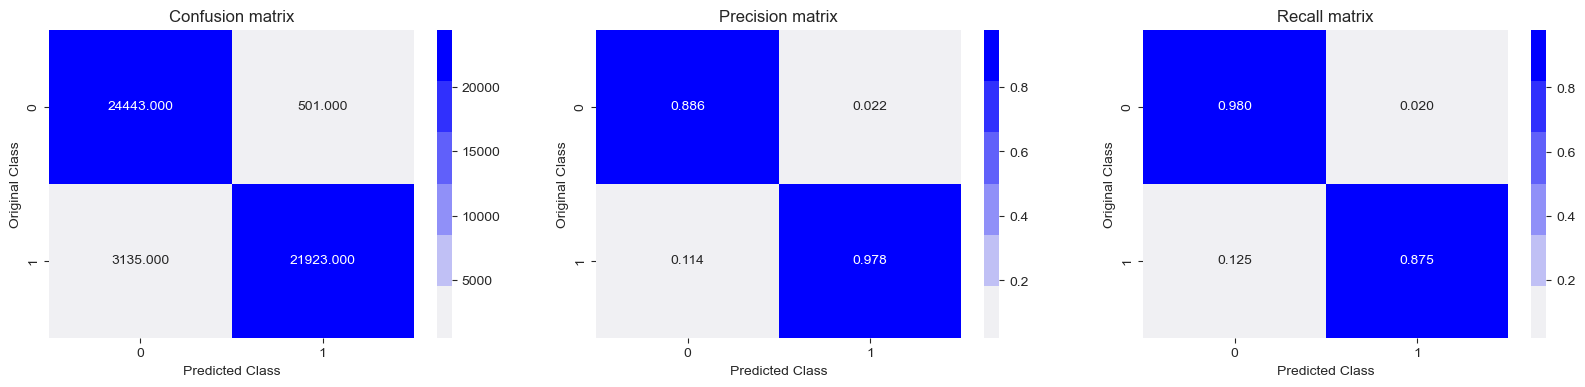

In [102]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

- This code plots AUC-ROC curve as i have mentioned above

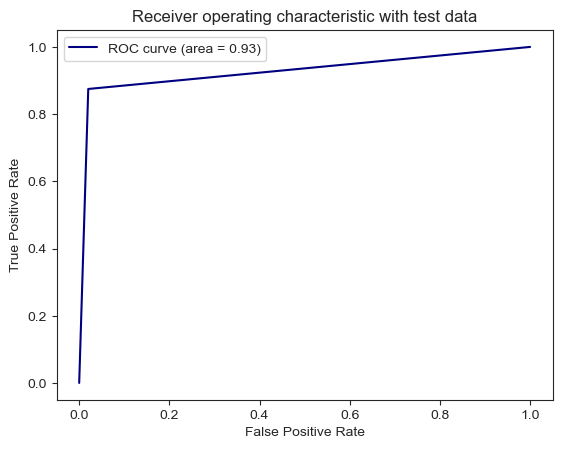

In [103]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

- This code visualizes the ranking of the most important features that the model has used for learning and prediction.

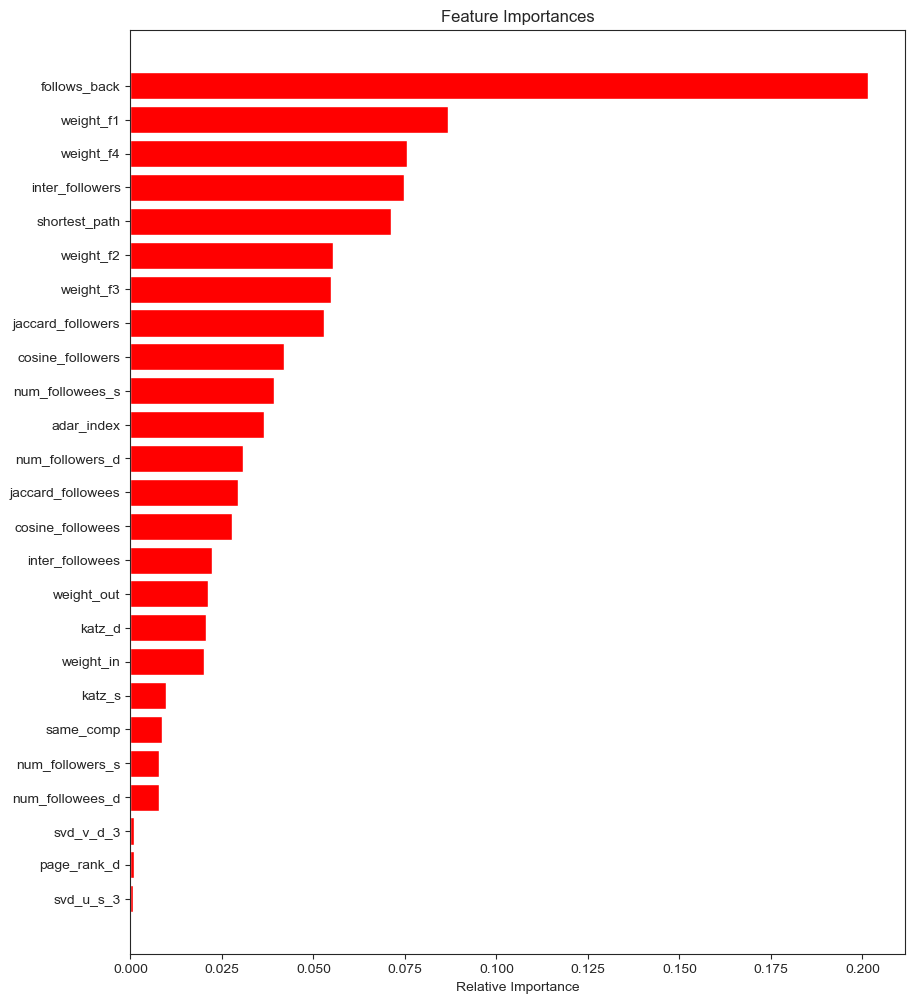

In [104]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- This code shows few rows to observe

In [105]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0.0,0.000000,0.000000,0.000000,11,6,15,8,0,0,...,-1.983694e-06,-1.545081e-13,-8.108431e-13,-1.719691e-14,-1.355368e-12,-4.675314e-13,-1.128581e-06,-6.616687e-14,-9.771062e-13,-4.159999e-14
1,0.1,0.142857,0.094491,0.320256,7,4,13,3,1,2,...,-1.338796e-12,-8.442358e-14,-1.054638e-13,-2.220992e-16,-3.980017e-15,-5.955489e-13,-3.342242e-13,-7.308501e-14,-3.043086e-13,-3.066552e-17
2,0.0,0.000000,0.000000,0.000000,22,9,41,12,0,0,...,-5.427357e-06,-2.371408e-12,-6.499855e-12,-6.358327e-13,-2.023991e-12,-4.170758e-13,-4.720959e-07,-4.914014e-12,-1.283838e-12,-7.850140e-14
3,0.0,0.017094,0.000000,0.046907,20,19,101,18,0,2,...,-3.164065e-09,-1.420831e-10,-3.978446e-10,-2.509513e-10,-9.134443e-10,-1.595995e-10,-2.636867e-09,-1.721809e-10,-6.881800e-11,-2.551106e-10
4,0.0,0.000000,0.000000,0.000000,7,4,10,3,0,0,...,-1.427534e-13,-3.112758e-11,-2.818177e-13,-2.887696e-12,-9.164763e-14,-7.769978e-16,-4.989433e-15,-1.290704e-13,-4.050799e-16,-4.888430e-15


In [106]:
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0.052632,0.000000,0.029161,0.000000,6,14,6,9,1,0,...,-5.904459e-11,-2.701538e-12,-4.341620e-13,-5.535447e-14,-9.994075e-10,-5.791909e-10,-3.512019e-07,-2.486660e-09,-2.771145e-09,-1.727662e-12
1,0.076923,0.040000,0.050000,0.079057,4,10,16,10,1,1,...,-7.280786e-10,-4.108422e-15,-2.278363e-15,-4.607774e-18,-1.715312e-12,-1.727478e-12,-7.410093e-12,-7.618488e-14,-5.879724e-13,-1.225760e-15
2,0.000000,0.000000,0.000000,0.000000,8,43,7,42,0,0,...,-1.515120e-11,-2.438649e-12,-3.152527e-12,-5.580900e-14,-8.674619e-12,-3.357074e-10,-1.110601e-09,-2.150154e-11,-1.482890e-09,-4.294637e-12
3,0.000000,0.000000,0.000000,0.000000,4,2,2,6,0,0,...,-1.030694e-05,-4.982012e-14,-1.644679e-13,-1.619913e-14,-3.484079e-14,-1.586231e-14,-4.245276e-08,-1.432798e-14,-4.335040e-13,-3.911322e-14
4,0.478992,0.535088,0.065614,0.698067,77,99,83,92,57,61,...,-2.232148e-11,-3.396109e-09,-1.982225e-11,-4.045172e-10,-5.374549e-12,-7.941314e-12,-2.672618e-11,-4.061068e-09,-2.766259e-11,-4.881668e-10


- This code reads train_pos_after_eda.csv and test_pos_after_eda.csv, which contain the positive links for both the training and testing parts

In [107]:
train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
test_graph=nx.read_edgelist('data/after_eda/test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

- The author modified the old compute_features_stage1 function a bit.

In [108]:
from tqdm import tqdm
def compute_features_stage1(df,graph):
  num_followers_s =[]
  num_followees_s =[]
  num_followers_d =[]
  num_followees_d = []
  inter_followers= []
  inter_followees =[]
  for i,row in tqdm(df.iterrows()):
    try:
      s1 = set(graph.predecessors(row['source_node']))
      s2 = set(graph.successors(row['source_node']))
    except:
      s1 = set()
      s2 = set()
    try: 
      d1 = set(graph.predecessors(row["destination_node"]))
      d2 = set(graph.successors(row['destination_node']))
    except:
      d1 = set()
      d2 = set()
    num_followers_s.append(len(s1))
    num_followees_s.append(len(s2))
    num_followers_d.append(len(d1))
    num_followees_d.append(len(d2))

    inter_followees.append(len(s1.intersection(d1)))
    inter_followers.append(len(s2.intersection(d2)))

  return num_followers_d,num_followees_d,num_followers_s,num_followees_s,inter_followers,inter_followees     

In [109]:
train_num_followers_d,train_num_followees_d,train_num_followers_s,train_num_followees_s,train_inter_followers,train_inter_followees = compute_features_stage1(df_final_train,train_graph)
test_num_followers_d,test_num_followees_d,test_num_followers_s,test_num_followees_s,test_inter_followers,test_inter_followees = compute_features_stage1(df_final_test,test_graph)

100002it [00:07, 12916.38it/s]
50002it [00:02, 17339.60it/s]


In [110]:
len(train_num_followers_d)

100002

In [111]:
len(test_num_followers_d)

50002

In [112]:
df_final_train["num_followers_d"] = train_num_followers_d
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0.0,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,-1.983694e-06,-1.545081e-13,-8.108431e-13,-1.719691e-14,-1.355368e-12,-4.675314e-13,-1.128581e-06,-6.616687e-14,-9.771062e-13,-4.159999e-14
1,0.1,0.142857,0.094491,0.320256,7,0,13,3,1,2,...,-1.338796e-12,-8.442358e-14,-1.054638e-13,-2.220992e-16,-3.980017e-15,-5.955489e-13,-3.342242e-13,-7.308501e-14,-3.043086e-13,-3.066552e-17
2,0.0,0.000000,0.000000,0.000000,22,0,41,12,0,0,...,-5.427357e-06,-2.371408e-12,-6.499855e-12,-6.358327e-13,-2.023991e-12,-4.170758e-13,-4.720959e-07,-4.914014e-12,-1.283838e-12,-7.850140e-14
3,0.0,0.017094,0.000000,0.046907,20,0,101,18,0,2,...,-3.164065e-09,-1.420831e-10,-3.978446e-10,-2.509513e-10,-9.134443e-10,-1.595995e-10,-2.636867e-09,-1.721809e-10,-6.881800e-11,-2.551106e-10
4,0.0,0.000000,0.000000,0.000000,7,0,10,3,0,0,...,-1.427534e-13,-3.112758e-11,-2.818177e-13,-2.887696e-12,-9.164763e-14,-7.769978e-16,-4.989433e-15,-1.290704e-13,-4.050799e-16,-4.888430e-15


In [113]:
df_final_test['num_followers_d'] = test_num_followees_d
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0.052632,0.000000,0.029161,0.000000,6,0,6,9,1,0,...,-5.904459e-11,-2.701538e-12,-4.341620e-13,-5.535447e-14,-9.994075e-10,-5.791909e-10,-3.512019e-07,-2.486660e-09,-2.771145e-09,-1.727662e-12
1,0.076923,0.040000,0.050000,0.079057,4,0,16,10,1,1,...,-7.280786e-10,-4.108422e-15,-2.278363e-15,-4.607774e-18,-1.715312e-12,-1.727478e-12,-7.410093e-12,-7.618488e-14,-5.879724e-13,-1.225760e-15
2,0.000000,0.000000,0.000000,0.000000,8,0,7,42,0,0,...,-1.515120e-11,-2.438649e-12,-3.152527e-12,-5.580900e-14,-8.674619e-12,-3.357074e-10,-1.110601e-09,-2.150154e-11,-1.482890e-09,-4.294637e-12
3,0.000000,0.000000,0.000000,0.000000,4,0,2,6,0,0,...,-1.030694e-05,-4.982012e-14,-1.644679e-13,-1.619913e-14,-3.484079e-14,-1.586231e-14,-4.245276e-08,-1.432798e-14,-4.335040e-13,-3.911322e-14
4,0.478992,0.535088,0.065614,0.698067,77,0,83,92,57,61,...,-2.232148e-11,-3.396109e-09,-1.982225e-11,-4.045172e-10,-5.374549e-12,-7.941314e-12,-2.672618e-11,-4.061068e-09,-2.766259e-11,-4.881668e-10


- This code adds followers_preferential_attach and followees_preferential_attach features

In [114]:
source = np.array(df_final_train["num_followers_s"])
destination = np.array(df_final_train["num_followers_d"])
followers_preferential = []
for i in range(len(source)):
  followers_preferential.append(source[i]*destination[i])
df_final_train["followers_preferential_attach"]  = followers_preferential 
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach
0,0.0,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,-1.545081e-13,-8.108431e-13,-1.719691e-14,-1.355368e-12,-4.675314e-13,-1.128581e-06,-6.616687e-14,-9.771062e-13,-4.159999e-14,0
1,0.1,0.142857,0.094491,0.320256,7,0,13,3,1,2,...,-8.442358e-14,-1.054638e-13,-2.220992e-16,-3.980017e-15,-5.955489e-13,-3.342242e-13,-7.308501e-14,-3.043086e-13,-3.066552e-17,0
2,0.0,0.000000,0.000000,0.000000,22,0,41,12,0,0,...,-2.371408e-12,-6.499855e-12,-6.358327e-13,-2.023991e-12,-4.170758e-13,-4.720959e-07,-4.914014e-12,-1.283838e-12,-7.850140e-14,0
3,0.0,0.017094,0.000000,0.046907,20,0,101,18,0,2,...,-1.420831e-10,-3.978446e-10,-2.509513e-10,-9.134443e-10,-1.595995e-10,-2.636867e-09,-1.721809e-10,-6.881800e-11,-2.551106e-10,0
4,0.0,0.000000,0.000000,0.000000,7,0,10,3,0,0,...,-3.112758e-11,-2.818177e-13,-2.887696e-12,-9.164763e-14,-7.769978e-16,-4.989433e-15,-1.290704e-13,-4.050799e-16,-4.888430e-15,0


In [115]:
source = np.array(df_final_train["num_followees_s"])
destination = np.array(df_final_train["num_followees_s"])
followees_preferential = []
for i in range(len(source)):
  followees_preferential.append(source[i]*destination[i])
df_final_train["followees_preferential_attach"]  = followees_preferential 
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach
0,0.0,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,-8.108431e-13,-1.719691e-14,-1.355368e-12,-4.675314e-13,-1.128581e-06,-6.616687e-14,-9.771062e-13,-4.159999e-14,0,225
1,0.1,0.142857,0.094491,0.320256,7,0,13,3,1,2,...,-1.054638e-13,-2.220992e-16,-3.980017e-15,-5.955489e-13,-3.342242e-13,-7.308501e-14,-3.043086e-13,-3.066552e-17,0,169
2,0.0,0.000000,0.000000,0.000000,22,0,41,12,0,0,...,-6.499855e-12,-6.358327e-13,-2.023991e-12,-4.170758e-13,-4.720959e-07,-4.914014e-12,-1.283838e-12,-7.850140e-14,0,1681
3,0.0,0.017094,0.000000,0.046907,20,0,101,18,0,2,...,-3.978446e-10,-2.509513e-10,-9.134443e-10,-1.595995e-10,-2.636867e-09,-1.721809e-10,-6.881800e-11,-2.551106e-10,0,10201
4,0.0,0.000000,0.000000,0.000000,7,0,10,3,0,0,...,-2.818177e-13,-2.887696e-12,-9.164763e-14,-7.769978e-16,-4.989433e-15,-1.290704e-13,-4.050799e-16,-4.888430e-15,0,100


In [116]:
source = np.array(df_final_test["num_followers_s"])
destination = np.array(df_final_test["num_followers_d"])
followers_preferential = []
for i in range(len(source)):
  followers_preferential.append(source[i]*destination[i])
df_final_test["followers_preferential_attach"]  = followers_preferential 
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach
0,0.052632,0.000000,0.029161,0.000000,6,0,6,9,1,0,...,-2.701538e-12,-4.341620e-13,-5.535447e-14,-9.994075e-10,-5.791909e-10,-3.512019e-07,-2.486660e-09,-2.771145e-09,-1.727662e-12,0
1,0.076923,0.040000,0.050000,0.079057,4,0,16,10,1,1,...,-4.108422e-15,-2.278363e-15,-4.607774e-18,-1.715312e-12,-1.727478e-12,-7.410093e-12,-7.618488e-14,-5.879724e-13,-1.225760e-15,0
2,0.000000,0.000000,0.000000,0.000000,8,0,7,42,0,0,...,-2.438649e-12,-3.152527e-12,-5.580900e-14,-8.674619e-12,-3.357074e-10,-1.110601e-09,-2.150154e-11,-1.482890e-09,-4.294637e-12,0
3,0.000000,0.000000,0.000000,0.000000,4,0,2,6,0,0,...,-4.982012e-14,-1.644679e-13,-1.619913e-14,-3.484079e-14,-1.586231e-14,-4.245276e-08,-1.432798e-14,-4.335040e-13,-3.911322e-14,0
4,0.478992,0.535088,0.065614,0.698067,77,0,83,92,57,61,...,-3.396109e-09,-1.982225e-11,-4.045172e-10,-5.374549e-12,-7.941314e-12,-2.672618e-11,-4.061068e-09,-2.766259e-11,-4.881668e-10,0


In [117]:
source = np.array(df_final_test["num_followees_s"])
destination = np.array(df_final_test["num_followees_s"])
followees_preferential = []
for i in range(len(source)):
  followees_preferential.append(source[i]*destination[i])
df_final_test["followees_preferential_attach"]  = followees_preferential 
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach
0,0.052632,0.000000,0.029161,0.000000,6,0,6,9,1,0,...,-4.341620e-13,-5.535447e-14,-9.994075e-10,-5.791909e-10,-3.512019e-07,-2.486660e-09,-2.771145e-09,-1.727662e-12,0,36
1,0.076923,0.040000,0.050000,0.079057,4,0,16,10,1,1,...,-2.278363e-15,-4.607774e-18,-1.715312e-12,-1.727478e-12,-7.410093e-12,-7.618488e-14,-5.879724e-13,-1.225760e-15,0,256
2,0.000000,0.000000,0.000000,0.000000,8,0,7,42,0,0,...,-3.152527e-12,-5.580900e-14,-8.674619e-12,-3.357074e-10,-1.110601e-09,-2.150154e-11,-1.482890e-09,-4.294637e-12,0,49
3,0.000000,0.000000,0.000000,0.000000,4,0,2,6,0,0,...,-1.644679e-13,-1.619913e-14,-3.484079e-14,-1.586231e-14,-4.245276e-08,-1.432798e-14,-4.335040e-13,-3.911322e-14,0,4
4,0.478992,0.535088,0.065614,0.698067,77,0,83,92,57,61,...,-1.982225e-11,-4.045172e-10,-5.374549e-12,-7.941314e-12,-2.672618e-11,-4.061068e-09,-2.766259e-11,-4.881668e-10,0,6889


In [118]:
sorted(df_final_train.columns)

['adar_index',
 'authorities_d',
 'authorities_s',
 'cosine_followees',
 'cosine_followers',
 'followees_preferential_attach',
 'followers_preferential_attach',
 'follows_back',
 'hubs_d',
 'hubs_s',
 'inter_followees',
 'inter_followers',
 'jaccard_followees',
 'jaccard_followers',
 'katz_d',
 'katz_s',
 'num_followees_d',
 'num_followees_s',
 'num_followers_d',
 'num_followers_s',
 'page_rank_d',
 'page_rank_s',
 'same_comp',
 'shortest_path',
 'svd_u_d_1',
 'svd_u_d_2',
 'svd_u_d_3',
 'svd_u_d_4',
 'svd_u_d_5',
 'svd_u_d_6',
 'svd_u_s_1',
 'svd_u_s_2',
 'svd_u_s_3',
 'svd_u_s_4',
 'svd_u_s_5',
 'svd_u_s_6',
 'svd_v_d_1',
 'svd_v_d_2',
 'svd_v_d_3',
 'svd_v_d_4',
 'svd_v_d_5',
 'svd_v_d_6',
 'svd_v_s_1',
 'svd_v_s_2',
 'svd_v_s_3',
 'svd_v_s_4',
 'svd_v_s_5',
 'svd_v_s_6',
 'weight_f1',
 'weight_f2',
 'weight_f3',
 'weight_f4',
 'weight_in',
 'weight_out']

- This code adds some new SVD features

In [119]:
svd_dot_U =[]
range_value = len(np.array(df_final_train["svd_u_d_1"]))
for i in range(range_value):
  u_s = []
  u_d = []
  u_s.append(np.array(df_final_train["svd_u_s_1"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_2"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_3"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_4"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_5"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_6"][i]))

  u_d.append(np.array(df_final_train["svd_u_d_1"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_2"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_3"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_4"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_5"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_6"][i]))

  svd_dot_U.append(np.dot(u_s,u_d))

In [120]:
df_final_train["svd_dot_U"] = svd_dot_U
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U
0,0.0,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,-1.719691e-14,-1.355368e-12,-4.675314e-13,-1.128581e-06,-6.616687e-14,-9.771062e-13,-4.159999e-14,0,225,1.114948e-11
1,0.1,0.142857,0.094491,0.320256,7,0,13,3,1,2,...,-2.220992e-16,-3.980017e-15,-5.955489e-13,-3.342242e-13,-7.308501e-14,-3.043086e-13,-3.066552e-17,0,169,1.435861e-24
2,0.0,0.000000,0.000000,0.000000,22,0,41,12,0,0,...,-6.358327e-13,-2.023991e-12,-4.170758e-13,-4.720959e-07,-4.914014e-12,-1.283838e-12,-7.850140e-14,0,1681,8.613633e-13
3,0.0,0.017094,0.000000,0.046907,20,0,101,18,0,2,...,-2.509513e-10,-9.134443e-10,-1.595995e-10,-2.636867e-09,-1.721809e-10,-6.881800e-11,-2.551106e-10,0,10201,1.112927e-16
4,0.0,0.000000,0.000000,0.000000,7,0,10,3,0,0,...,-2.887696e-12,-9.164763e-14,-7.769978e-16,-4.989433e-15,-1.290704e-13,-4.050799e-16,-4.888430e-15,0,100,4.059112e-24


In [121]:
svd_dot_V = []
range_value = len(np.array(df_final_train["svd_v_d_1"]))
for i in range(range_value):
  v_s = []
  v_d = []
  v_s.append(np.array(df_final_train["svd_v_s_1"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_2"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_3"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_4"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_5"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_6"][i]))

  v_d.append(np.array(df_final_train["svd_v_d_1"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_2"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_3"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_4"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_5"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_6"][i]))

  svd_dot_V.append(np.dot(v_s,v_d))

In [122]:
df_final_train["svd_dot_V"] = svd_dot_V
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U,svd_dot_V
0,0.0,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,-1.355368e-12,-4.675314e-13,-1.128581e-06,-6.616687e-14,-9.771062e-13,-4.159999e-14,0,225,1.114948e-11,2.238759e-12
1,0.1,0.142857,0.094491,0.320256,7,0,13,3,1,2,...,-3.980017e-15,-5.955489e-13,-3.342242e-13,-7.308501e-14,-3.043086e-13,-3.066552e-17,0,169,1.435861e-24,2.266842e-24
2,0.0,0.000000,0.000000,0.000000,22,0,41,12,0,0,...,-2.023991e-12,-4.170758e-13,-4.720959e-07,-4.914014e-12,-1.283838e-12,-7.850140e-14,0,1681,8.613633e-13,2.562233e-12
3,0.0,0.017094,0.000000,0.046907,20,0,101,18,0,2,...,-9.134443e-10,-1.595995e-10,-2.636867e-09,-1.721809e-10,-6.881800e-11,-2.551106e-10,0,10201,1.112927e-16,8.496825e-18
4,0.0,0.000000,0.000000,0.000000,7,0,10,3,0,0,...,-9.164763e-14,-7.769978e-16,-4.989433e-15,-1.290704e-13,-4.050799e-16,-4.888430e-15,0,100,4.059112e-24,4.059484e-24


In [123]:
svd_dot_U =[]
range_value = len(np.array(df_final_test["svd_u_d_1"]))
for i in range(range_value):
  u_s = []
  u_d = []
  u_s.append(np.array(df_final_test["svd_u_s_1"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_2"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_3"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_4"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_5"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_6"][i]))

  u_d.append(np.array(df_final_test["svd_u_d_1"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_2"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_3"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_4"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_5"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_6"][i]))

  svd_dot_U.append(np.dot(u_s,u_d))

In [124]:
df_final_test["svd_dot_U"] = svd_dot_U
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U
0,0.052632,0.000000,0.029161,0.000000,6,0,6,9,1,0,...,-5.535447e-14,-9.994075e-10,-5.791909e-10,-3.512019e-07,-2.486660e-09,-2.771145e-09,-1.727662e-12,0,36,8.425167e-20
1,0.076923,0.040000,0.050000,0.079057,4,0,16,10,1,1,...,-4.607774e-18,-1.715312e-12,-1.727478e-12,-7.410093e-12,-7.618488e-14,-5.879724e-13,-1.225760e-15,0,256,1.494060e-20
2,0.000000,0.000000,0.000000,0.000000,8,0,7,42,0,0,...,-5.580900e-14,-8.674619e-12,-3.357074e-10,-1.110601e-09,-2.150154e-11,-1.482890e-09,-4.294637e-12,0,49,2.574695e-22
3,0.000000,0.000000,0.000000,0.000000,4,0,2,6,0,0,...,-1.619913e-14,-3.484079e-14,-1.586231e-14,-4.245276e-08,-1.432798e-14,-4.335040e-13,-3.911322e-14,0,4,8.534065e-15
4,0.478992,0.535088,0.065614,0.698067,77,0,83,92,57,61,...,-4.045172e-10,-5.374549e-12,-7.941314e-12,-2.672618e-11,-4.061068e-09,-2.766259e-11,-4.881668e-10,0,6889,3.032581e-17


In [125]:
svd_dot_V = []
range_value = len(np.array(df_final_test["svd_v_d_1"]))
for i in range(range_value):
  v_s = []
  v_d = []
  v_s.append(np.array(df_final_test["svd_v_s_1"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_2"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_3"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_4"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_5"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_6"][i]))

  v_d.append(np.array(df_final_test["svd_v_d_1"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_2"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_3"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_4"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_5"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_6"][i]))

  svd_dot_V.append(np.dot(v_s,v_d))

In [126]:
df_final_test["svd_dot_V"] = svd_dot_V
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U,svd_dot_V
0,0.052632,0.000000,0.029161,0.000000,6,0,6,9,1,0,...,-9.994075e-10,-5.791909e-10,-3.512019e-07,-2.486660e-09,-2.771145e-09,-1.727662e-12,0,36,8.425167e-20,2.074482e-17
1,0.076923,0.040000,0.050000,0.079057,4,0,16,10,1,1,...,-1.715312e-12,-1.727478e-12,-7.410093e-12,-7.618488e-14,-5.879724e-13,-1.225760e-15,0,256,1.494060e-20,5.414436e-21
2,0.000000,0.000000,0.000000,0.000000,8,0,7,42,0,0,...,-8.674619e-12,-3.357074e-10,-1.110601e-09,-2.150154e-11,-1.482890e-09,-4.294637e-12,0,49,2.574695e-22,2.237675e-20
3,0.000000,0.000000,0.000000,0.000000,4,0,2,6,0,0,...,-3.484079e-14,-1.586231e-14,-4.245276e-08,-1.432798e-14,-4.335040e-13,-3.911322e-14,0,4,8.534065e-15,4.375581e-13
4,0.478992,0.535088,0.065614,0.698067,77,0,83,92,57,61,...,-5.374549e-12,-7.941314e-12,-2.672618e-11,-4.061068e-09,-2.766259e-11,-4.881668e-10,0,6889,3.032581e-17,1.399052e-17


In [127]:
x_train  =  df_final_train
x_test = df_final_test

In [128]:
x_train.shape

(100002, 56)

In [129]:
y_train.shape

(100002,)

In [130]:
x_test.shape

(50002, 56)

In [131]:
y_test.shape

(50002,)

In [132]:
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV

- Plot confusion matrix

In [133]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [0,1]
    cmap=sns.light_palette("green")
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))

    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

- This code performs a random search on the XGBoost classifier to find the best combination of hyperparameters. The random search is conducted using the specified hyperparameter distributions, and the performance of each combination is evaluated using cross-validation. The final result is stored in the random_cfl1 object, which contains the best hyperparameters found during the search.

In [134]:
params = {
        'min_child_weight': [1, 5, 10],
        'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' :[100,200,500,1000,2000],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
          }
xgboost = XGBClassifier()          
random_cfl1=RandomizedSearchCV(xgboost,param_distributions = params,verbose=10,n_jobs=-1)
random_cfl1.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=10)

In [135]:
print(random_cfl1.best_params_)

{'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 1.0}


- This code block trains an XGBoost classifier (best_xgb) with specific hyperparameters (by author). It then uses the CalibratedClassifierCV class to calibrate the predicted probabilities of best_xgb using the sigmoid method. The final calibrated classifier is stored in the clf object.

In [136]:
from sklearn.calibration import CalibratedClassifierCV
best_xgb = XGBClassifier(sub_sample=0.8,learning_rate = 0.2,colsample_bytree=0.6,max_depth=5,n_estimators=1000,min_child_weight=5,gamma=5)
best_xgb.fit(x_train,y_train)
clf = CalibratedClassifierCV(best_xgb,method="sigmoid")
clf.fit(x_train,y_train)

[14:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[14:35:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[14:36:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[14:37:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[14:39:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.



CalibratedClassifierCV(estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.6,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=5,
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.2, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=5,
                                               max_leaves=None,
                                               min_child_weight=5, missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=1000, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None,
                                               random_state=None, ...))

- This code calculates and prints the log loss for both the training and test sets using the calibrated classifier (clf). It also plots the confusion matrix based on the predicted labels for the test data.

the train log loss is 0.02262697350443687
the test log loss is 0.35826934151480677
Number of misclassified points  9.341626334946602
-------------------------------------------------- Confusion matrix --------------------------------------------------


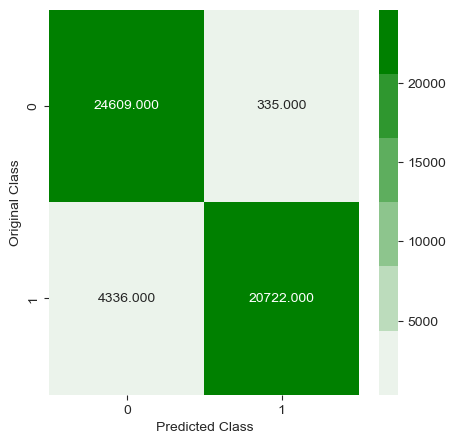

-------------------------------------------------- Precision matrix --------------------------------------------------


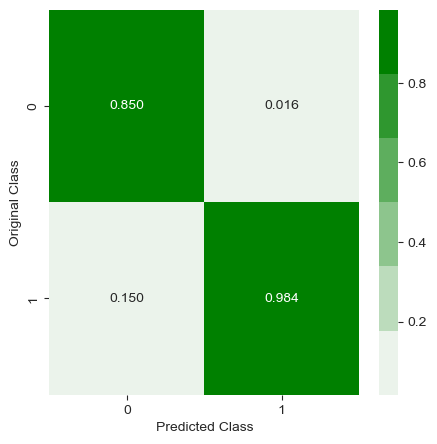

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


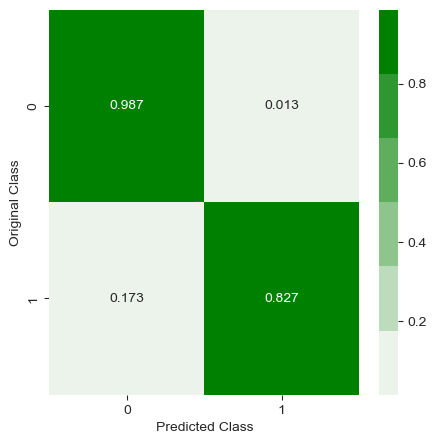

Sum of rows in precision matrix [1. 1.]


In [137]:
from sklearn.metrics import log_loss
predict_y = clf.predict_proba(x_train)
print("the train log loss is",log_loss(y_train,predict_y,labels=best_xgb.classes_))
predict_y = clf.predict_proba(x_test)
print("the test log loss is",log_loss(y_test,predict_y,labels = best_xgb.classes_))
plot_confusion_matrix(y_test,clf.predict(x_test))

- The F1 scores show that model performs better on train set but worse on test set in comparison with Random Forest

In [138]:
from sklearn.metrics import f1_score
print("f1 score for train data",f1_score(y_train,clf.predict(x_train)))
print("f1 score for test data",f1_score(y_test,clf.predict(x_test)))

f1 score for train data 0.9927673772751793
f1 score for test data 0.8987097473707037


- AUC is lower than Random Forest (0.906<0.93)

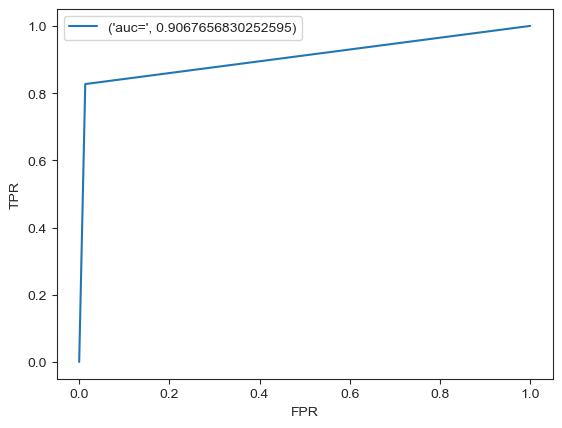

In [139]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,clf.predict(x_test))
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr,label = ('auc=',auc_sc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

- This code show the ranking of importance features with new features added above

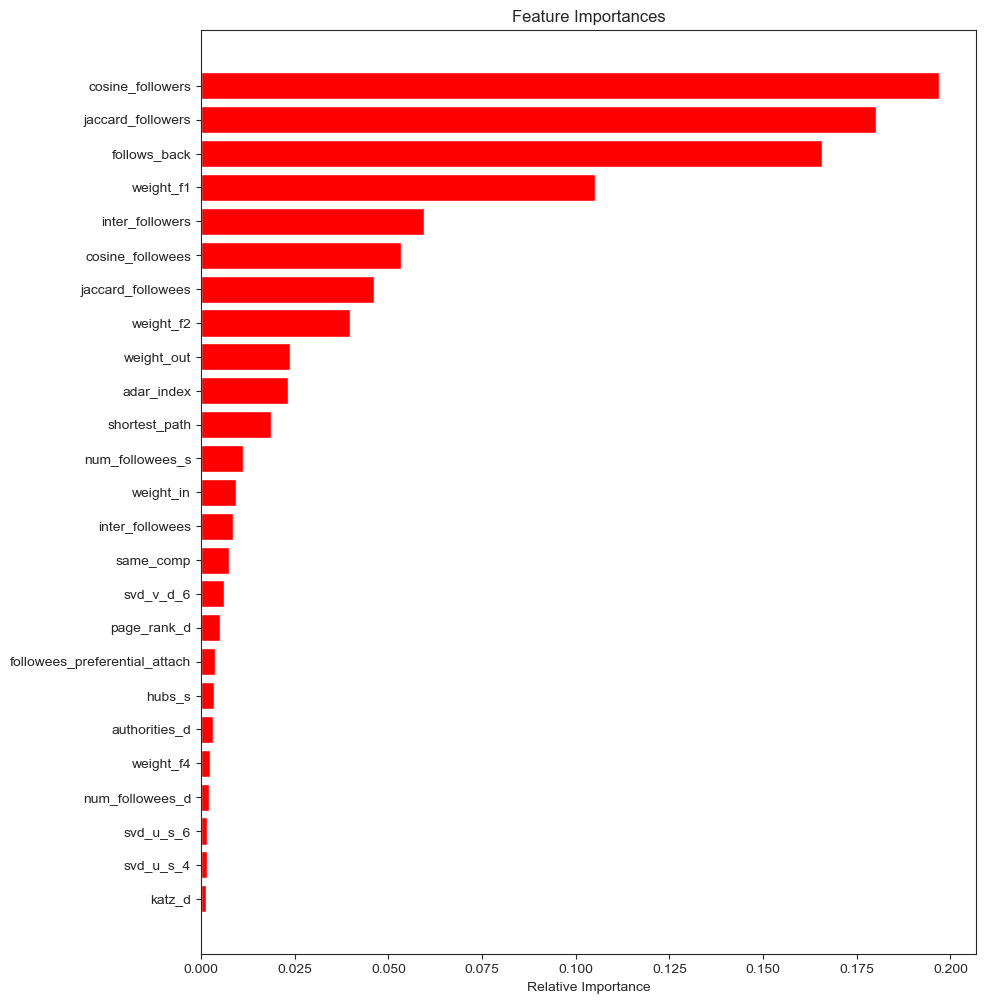

In [140]:
features = df_final_train.columns
importances = best_xgb.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- This code print F1_score for XGBoost (the results is from author)

In [141]:
from prettytable import PrettyTable
t = PrettyTable()
t.field_names=["model","train_f1_Score","test_f1_score"]
t.add_row(["XGBoost","0.9920553921274338","0.9124241511382708"])
print(t)

+---------+--------------------+--------------------+
|  model  |   train_f1_Score   |   test_f1_score    |
+---------+--------------------+--------------------+
| XGBoost | 0.9920553921274338 | 0.9124241511382708 |
+---------+--------------------+--------------------+


- Overall, train_f1_Score on XGBoost is better than Random Forest (0.992>0.967) but test_f1_score on XGBoost is worse than Random Forest (0.912<0.923). But their F1 scores are very high, both are good models. 

---

## References

- https://towardsdatascience.com/17-types-of-similarity-and-dissimilarity-measures-used-in-data-science-3eb914d2681
- https://www.statisticshowto.com/jaccard-index/
- https://en.wikipedia.org/wiki/Cosine_similarity
- https://en.wikipedia.org/wiki/PageRank
- https://www.youtube.com/watch?v=P8Kt6Abq_rM
- https://en.wikipedia.org/wiki/Adamic%E2%80%93Adar_index
- https://en.wikipedia.org/wiki/HITS_algorithm
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5